In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dmba import adjusted_r2_score
from sklearn.metrics import r2_score
%matplotlib inline

In [87]:
df_insurance = pd.read_csv("insurance.csv")

In [88]:
df_insurance.describe()

,age,bmi,children,charges
count,5602.000000,5535.000000,5602.000000,5602.000000
mean,40.453588,31.167652,1.669761,19975.223378
std,14.156851,6.264668,1.021904,14096.146022
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.380000,1.000000,7731.534787
50%,41.000000,31.130000,2.000000,16923.405000
75%,54.000000,35.735000,2.000000,29012.677500
max,64.000000,53.130000,5.000000,63770.428010


In [89]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
df_insurance.isnull().sum()

age          0
sex          0
bmi         67
children     0
smoker       0
region       0
charges      0
dtype: int64

<AxesSubplot:>

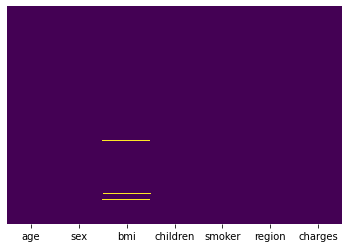

In [91]:
sns.heatmap(df_insurance.isnull(),yticklabels=False,cbar=False,cmap='viridis') #Heat map of true and false values, where true, it has yellow color

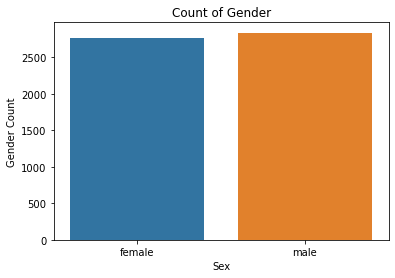

In [92]:
graph_sex = sns.countplot(x='sex',data=df_insurance)
graph_sex.set_xlabel('Sex')
graph_sex.set_ylabel('Gender Count')
graph_sex.set_title("Count of Gender")
plt.show()

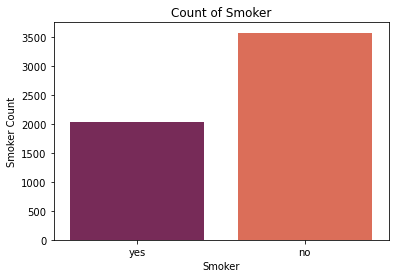

In [93]:
graph_smoker = sns.countplot(x='smoker',data=df_insurance, palette='rocket')

graph_smoker.set_xlabel('Smoker')
graph_smoker.set_ylabel('Smoker Count')
graph_smoker.set_title("Count of Smoker")

plt.show()

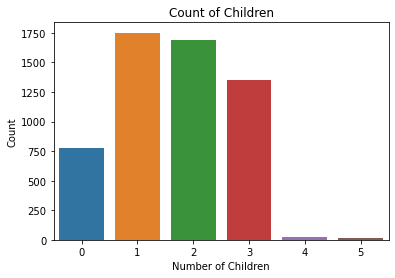

In [94]:
graph_children = sns.countplot(x='children',data=df_insurance)
graph_children.set_xlabel('Number of Children')
graph_children.set_ylabel('Count')
graph_children.set_title("Count of Children")

plt.show()

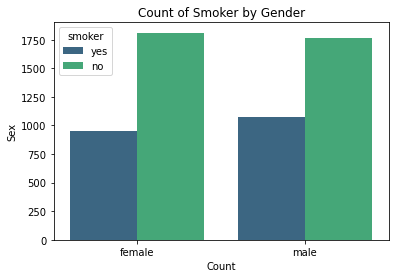

In [95]:
combined = sns.countplot(x='sex',data=df_insurance,hue='smoker', palette='viridis')
combined.set_xlabel('Count')
combined.set_ylabel('Sex')
combined.set_title("Count of Smoker by Gender")

plt.show()

<AxesSubplot:ylabel='Frequency'>

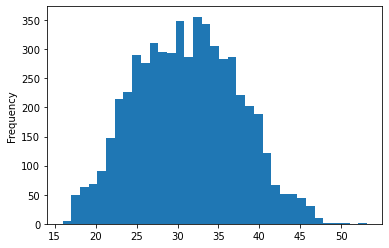

In [96]:
df_insurance['bmi'].plot.hist(bins=35)

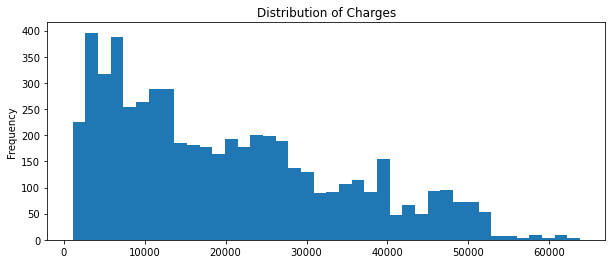

In [97]:
df_insurance['charges'].plot.hist(bins=40,figsize=(10,4))

plt.title("Distribution of Charges")

plt.show()

Text(0.5, 1.0, 'Age Distribution by Smoker Status')

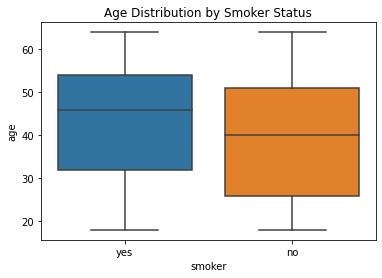

In [98]:
sns.boxplot(x='smoker',y='age',data=df_insurance)

plt.title("Age Distribution by Smoker Status")

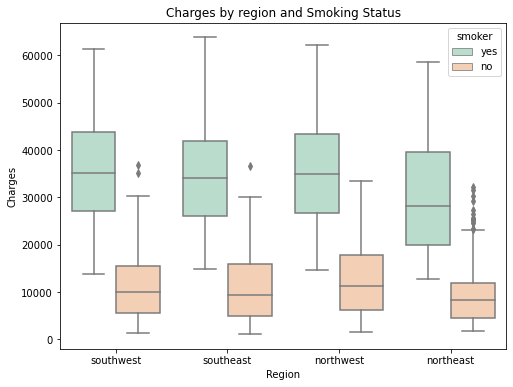

In [99]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_insurance, x='region', y='charges', hue='smoker',palette = 'Pastel2')
plt.title('Charges by region and Smoking Status')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

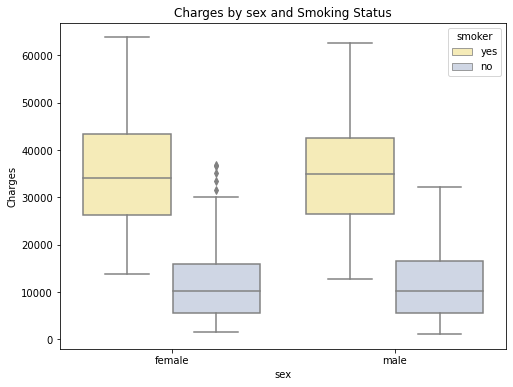

In [100]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_insurance, x='sex', y='charges', hue='smoker',palette = 'Pastel2_r')
plt.title('Charges by sex and Smoking Status')
plt.xlabel('sex')
plt.ylabel('Charges')
plt.show()

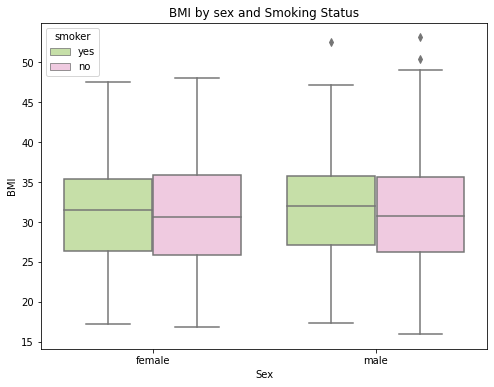

In [101]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_insurance, x='sex', y='bmi', hue='smoker',palette = 'PiYG_r')
plt.title('BMI by sex and Smoking Status')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

In [102]:
df_insurance['bmi'] = df_insurance.groupby(['age', 'sex'])['bmi'].transform(lambda x: x.fillna(x.mean())) 
# Filling NA values using groupby at Age and Sex

In [103]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

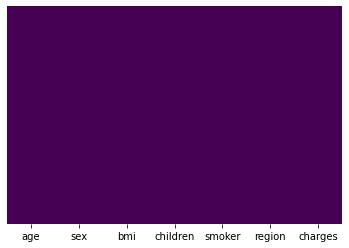

In [104]:
sns.heatmap(df_insurance.isnull(),yticklabels=False,cbar=False,cmap='viridis') #Heat map of true and false values, where true, it has yellow color

In [105]:
# All the null values are removed and filled with the mean value based on the age and gender

In [106]:
sex = pd.get_dummies(df_insurance['sex'],drop_first=True)
smoker = pd.get_dummies(df_insurance['smoker'],drop_first=True)
region = pd.get_dummies(df_insurance['region'],drop_first=True)
df_insurance=pd.concat([df_insurance,sex,smoker,region],axis=1)

In [107]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,male,yes,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [108]:
df_insurance = df_insurance.rename(columns={'age':'Age','bmi':'BMI','charges':'Charges','male':'Sex','yes':'Smoker'})

df_insurance = df_insurance.rename(columns={'northwest':'Northwest','southeast':'Southeast','southwest':'Southwest','children':'Children'})

<AxesSubplot:>

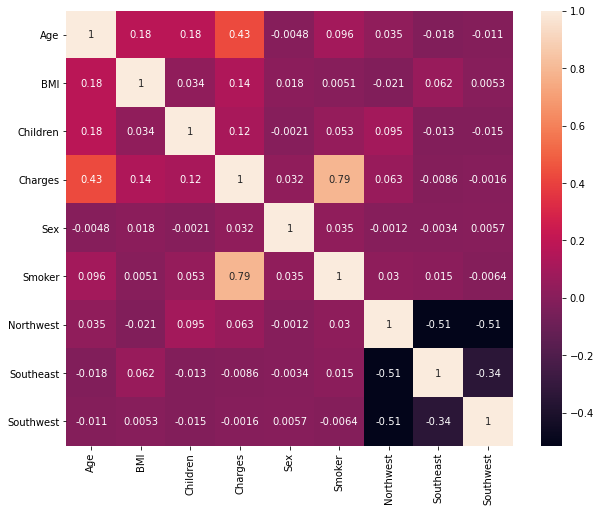

In [109]:
plt.figure(figsize=(10, 8))

sns.heatmap(df_insurance.corr(), annot = True)

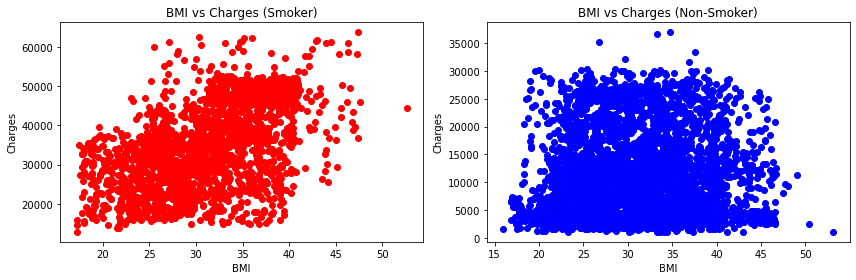

In [110]:
smoker_df = df_insurance[(df_insurance['Smoker'] == 1)]
non_smoker_df = df_insurance[(df_insurance['Smoker'] == 0)]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  

x1 = smoker_df['BMI']
y1 = smoker_df['Charges']

x2 = non_smoker_df['BMI']
y2 = non_smoker_df['Charges']


# Scatter plot 1
axes[0].scatter(x1, y1,color='red')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Charges')
axes[0].set_title('BMI vs Charges (Smoker)')

# Scatter plot 2
axes[1].scatter(x2, y2,color='blue')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Charges')
axes[1].set_title('BMI vs Charges (Non-Smoker)')


plt.tight_layout()

plt.show()

In [111]:
df_insurance.drop(['sex','smoker','region'],axis = 1, inplace = True)

# LINEAR REGRESSION

In [112]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

y = df_insurance['Charges']
X = df_insurance.drop(['Charges'],axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=101)

lm.fit(X_train,y_train)

LinearRegression()

In [113]:
print('Intercept',lm.intercept_)

Intercept -9856.890657362728


In [114]:
coefficeint = pd.DataFrame(lm.coef_,X.columns,columns = ['Coefficeint'])
coefficeint

,Coefficeint
Age,334.952830
BMI,192.997097
Children,-12.879684
Sex,262.890150
Smoker,22063.979687
Northwest,2605.349475
Southeast,1859.506937
Southwest,2168.588076


In [115]:
from dmba import regressionSummary

predictions = lm.predict(X_test)

In [116]:
regressionSummary(y_test,predictions)


Regression statistics

                      Mean Error (ME) : 30.4124
       Root Mean Squared Error (RMSE) : 7003.9536
            Mean Absolute Error (MAE) : 5718.9743
          Mean Percentage Error (MPE) : -23.7412
Mean Absolute Percentage Error (MAPE) : 46.3708


In [117]:
print("Adjusted R2 square is",round(adjusted_r2_score(y_test,predictions,lm),3))
print("R2 score is",round(r2_score(y_test, predictions),3))

Adjusted R2 square is 0.749
R2 score is 0.75


Text(0.5, 1.0, 'Scatter Plot for Actual vs Predicted Values for Linear Regression')

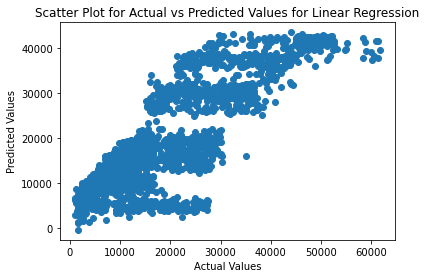

In [118]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot for Actual vs Predicted Values for Linear Regression')

# Checking Over-fitting

In [119]:
predictions_train = lm.predict(X_train)
regressionSummary(y_train,predictions_train)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 6964.5248
            Mean Absolute Error (MAE) : 5591.8915
          Mean Percentage Error (MPE) : -23.7848
Mean Absolute Percentage Error (MAPE) : 45.4624


In [120]:
from dmba import adjusted_r2_score
print("Adjusted R2 square is",round(adjusted_r2_score(y_train,predictions_train,lm),3))
print("R2 score is",round(r2_score(y_train, predictions_train),3))

Adjusted R2 square is 0.757
R2 score is 0.758


Text(0.5, 1.0, 'Scatter Plot for Actual vs Predicted Values')

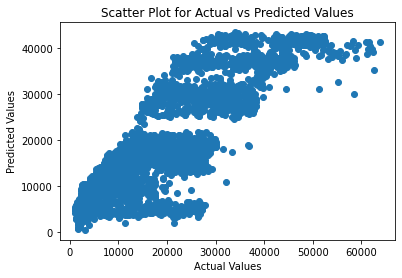

In [121]:
plt.scatter(y_train,predictions_train)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot for Actual vs Predicted Values')

# OLS MODEL

In [122]:
import statsmodels.api as sm
model = sm.OLS(y_test,X_test).fit()
predictions_ols = model.predict(X_test)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Charges   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                              2980.
Date:                Sat, 30 Sep 2023   Prob (F-statistic):                        0.00
Time:                        09:59:25   Log-Likelihood:                         -23058.
No. Observations:                2241   AIC:                                  4.613e+04
Df Residuals:                    2233   BIC:                                  4.618e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [123]:
# TO CHECK OVERFITTING FITTING ON TRAIN DATA
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Charges   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              4559.
Date:                Sat, 30 Sep 2023   Prob (F-statistic):                        0.00
Time:                        09:59:25   Log-Likelihood:                         -34583.
No. Observations:                3361   AIC:                                  6.918e+04
Df Residuals:                    3353   BIC:                                  6.923e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# RIDGE REGRESSION

In [124]:
from sklearn.linear_model import Ridge

Ridge_Reg = Ridge(alpha = 0.5)

Ridge_Reg.fit(X_train,y_train)

Ridge(alpha=0.5)

In [125]:
print('Intercept',Ridge_Reg.intercept_)

Intercept -9839.983535031784


In [126]:
coefficeint = pd.DataFrame(Ridge_Reg.coef_,X.columns,columns = ['Coefficeint'])
coefficeint

,Coefficeint
Age,334.996275
BMI,193.024567
Children,-12.093231
Sex,263.088355
Smoker,22050.312811
Northwest,2588.622966
Southeast,1842.821982
Southwest,2151.378607


In [127]:
predictions = Ridge_Reg.predict(X_test)

regressionSummary(y_test,predictions)


Regression statistics

                      Mean Error (ME) : 30.1200
       Root Mean Squared Error (RMSE) : 7003.9691
            Mean Absolute Error (MAE) : 5720.4599
          Mean Percentage Error (MPE) : -23.7768
Mean Absolute Percentage Error (MAPE) : 46.3960


In [128]:
print("Adjusted R2 square is",round(adjusted_r2_score(y_test,predictions,Ridge_Reg),3))
print("R2 score is",round(r2_score(y_test, predictions),3))

Adjusted R2 square is 0.749
R2 score is 0.75


Text(0.5, 1.0, 'Scatter Plot for Actual vs Predicted Values')

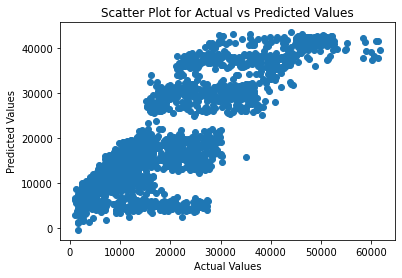

In [129]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot for Actual vs Predicted Values')

# Checking Overfitting by comparing accuracy of train and test

In [130]:
predictions_train = Ridge_Reg.predict(X_train)

regressionSummary(y_train,predictions_train)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 6964.5292
            Mean Absolute Error (MAE) : 5593.1946
          Mean Percentage Error (MPE) : -23.8212
Mean Absolute Percentage Error (MAPE) : 45.4869


In [131]:
print("Adjusted R2 square is",round(adjusted_r2_score(y_train,predictions_train,Ridge_Reg),3))
print("R2 score is",round(r2_score(y_train, predictions_train),3))

Adjusted R2 square is 0.757
R2 score is 0.758


# RANDOM FOREST

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


reg = RandomForestRegressor(n_estimators=25, random_state=42)  


reg.fit(X_train, y_train)


predictions = reg.predict(X_test)

In [133]:
print("R2 score is for test is",round(r2_score(y_test, predictions),3))

R2 score is for test is 0.821


Text(0, 0.5, 'Predicted')

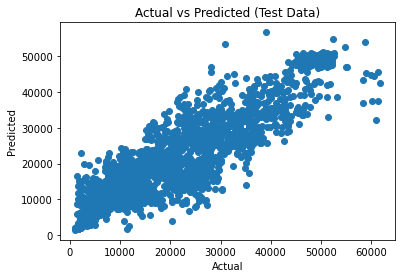

In [134]:
plt.scatter(y_test,predictions)
plt.title('Actual vs Predicted (Test Data)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Checking Over-fitting by comparing accuracy of test and train

In [135]:
predictions_train = reg.predict(X_train)

In [136]:
from sklearn.metrics import r2_score

r_squared = round(r2_score(y_train, predictions_train),3)
print("R_Sqaured (Train)", r_squared)

R_Sqaured (Train) 0.97
